## Пример решения с некоторыми визуализациями

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict #по умолчанию всегда вызывается функция, возвращающая значение
import numpy as np
import seaborn as sns
import os
import pickle
import sys
sys.path.append("..")
from tqdm import tqdm
import networkx as nx
from opera_tools import plot_dataframe
%matplotlib inline

In [2]:
import pandas as pd
EPS = 1e-6

## Чтение данных

In [3]:
import pandas as pd
from tqdm import tqdm_notebook

def digraph_to_csv(graphs: list):
    df = pd.DataFrame(columns=['brick_id', 'shower_id', 'SX', 'SY', 'SZ', 'TX', 'TY'])
    for i, graph in tqdm_notebook(enumerate(graphs)):
        nodes = graph.nodes()
        SX = [node['features']['SX'] for node in nodes.values()]
        SY = [node['features']['SY'] for node in nodes.values()]
        SZ = [node['features']['SZ'] for node in nodes.values()]
        TX = [node['features']['TX'] for node in nodes.values()]
        TY = [node['features']['TY'] for node in nodes.values()]
        shower_id = [node['signal'] for node in nodes.values()]
        brick_id = [i for _ in range(len(shower_id))]
        df = df.append(
            pd.DataFrame(
                {'brick_id': brick_id, 
                 'shower_id': shower_id, 
                 'SX': SX, 
                 'SY': SY, 
                 'SZ': SZ, 
                 'TX': TX, 
                 'TY': TY
                }
            )
        )
    return df
        

def csv_to_digraph(df: pd.DataFrame):
    bricks = []
    for name, group in df.groupby('brick_id'):
        print(group.shape)
        nodes_to_add = []

        for node_id, row in group.iterrows():
            nodes_to_add.append(
                (
                    node_id,
                    {
                        'features': {
                            'SX': row.SX,
                            'SY': row.SY,
                            'SZ': row.SZ,
                            'TX': row.TX,
                            'TY': row.TY,
                        },
                        'signal': row['shower_id']
                    }
                )
            )
        graphx = nx.DiGraph()
        graphx.add_nodes_from(nodes_to_add)
        bricks.append(graphx)
    return bricks

In [4]:
df = np.loadtxt('opera_train.data')
df = pd.DataFrame(df, columns=['brick_id', 'SX', 'SY', 'SZ', 'TX', 'TY'])

In [5]:
df.describe()

,brick_id,SX,SY,SZ,TX,TY
count,3.000038e+06,3.000038e+06,3.000038e+06,3.000038e+06,3.000038e+06,3.000038e+06
mean,1.567069e+02,2.738012e+02,-1.778790e+01,1.273182e+04,-6.071416e-03,4.746569e-02
std,9.250816e+01,8.828597e+03,1.235045e+04,1.421383e+04,2.656373e-01,2.662827e-01
min,0.000000e+00,-6.094480e+04,-1.001771e+05,-3.579598e+04,-1.000000e+00,-1.000000e+00
25%,7.600000e+01,-7.211260e+03,-1.047952e+04,2.404130e+03,-1.303000e-01,-7.500000e-02
50%,1.510000e+02,4.323450e+02,-8.522000e+01,1.386176e+04,-7.000000e-03,5.180000e-02
75%,2.350000e+02,7.834820e+03,1.066924e+04,2.404407e+04,1.177000e-01,1.746000e-01
max,3.280000e+02,6.687302e+04,8.331471e+04,3.423230e+04,9.999000e-01,1.000000e+00


In [6]:
df.head()

,brick_id,SX,SY,SZ,TX,TY
0,0.0,-10177.71,-8697.63,-24330.69,-0.1505,0.1620
1,0.0,-10375.19,-8490.78,-23056.31,-0.1585,0.1673
2,0.0,-10591.61,-8268.13,-21785.49,-0.1913,0.1805
3,0.0,-10827.50,-8042.95,-20510.45,-0.1643,0.2017
4,0.0,-11053.21,-7800.50,-19239.20,-0.2127,0.1621


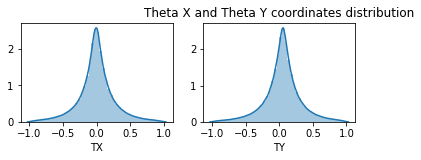

In [55]:
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)


# Tell pointplot to plot on ax1 with the ax argument
sns.distplot(df.TX, ax = ax1)
sns.distplot(df.TY, ax = ax2)

plt.title('Theta X and Theta Y coordinates distribution')
plt.show()



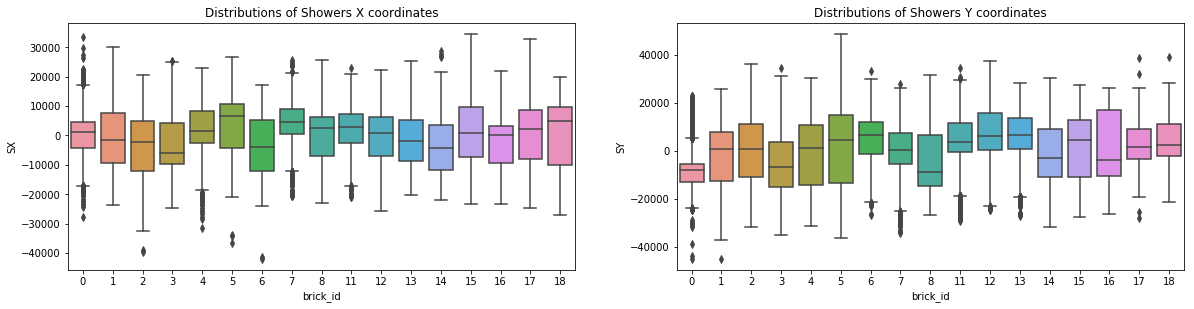

In [92]:
df.brick_id = df.brick_id.astype(int)

fig = plt.figure(figsize=(20, 10))


ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title('Distributions of Showers X coordinates')
ax2.set_title('Distributions of Showers Y coordinates')

sns.boxplot(y='SX',x='brick_id', data = df.loc[df.brick_id<=20], ax = ax1)
sns.boxplot(y='SY',x='brick_id', data = df.loc[df.brick_id<=20], ax = ax2)

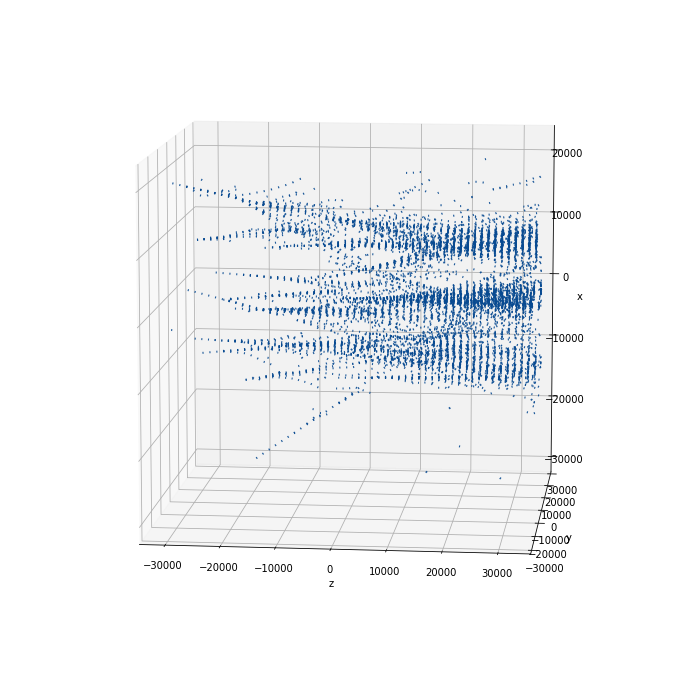

In [33]:
# будьте осторжны! Не подавайте на вход весь датафрейм
plot_dataframe(df.loc[df.brick_id==4])

In [62]:
df_labels = np.loadtxt('opera_train.solution')
df_labels = pd.DataFrame(df_labels, columns=['brick_id', 'shower_id'])

In [67]:
df_labels.describe()

,brick_id,shower_id
count,3.000038e+06,3.000038e+06
mean,1.567069e+02,1.173785e+01
std,9.250816e+01,7.324248e+00
min,0.000000e+00,0.000000e+00
25%,7.600000e+01,6.000000e+00
50%,1.510000e+02,1.100000e+01
75%,2.350000e+02,1.800000e+01
max,3.280000e+02,2.800000e+01


In [75]:
df_labels.head()

,brick_id,shower_id
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


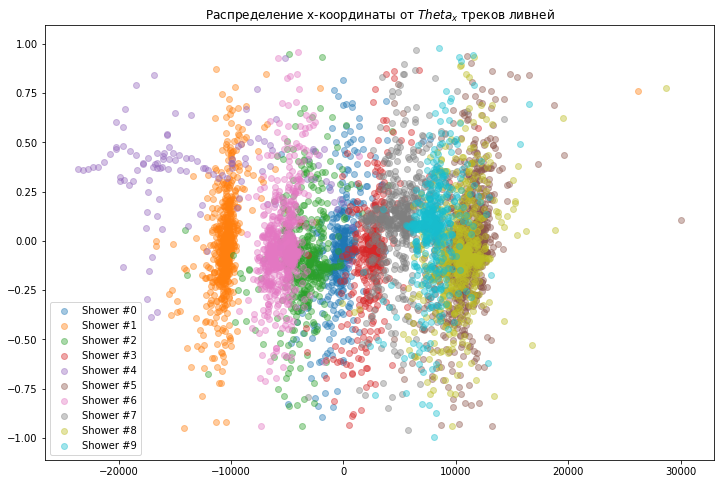

In [70]:
plt.figure(figsize=(12, 8))
plt.title('Распределение x-координаты от $Theta_x$ треков ливней')
for i in range(10):
    plt.scatter(df.loc[(df_labels.brick_id==1) & (df_labels.shower_id==i)].SX, 
                df.loc[(df_labels.brick_id==1) & (df_labels.shower_id==i)].TX,
                label='Shower #{}'.format(i), alpha=0.4)
plt.legend()
plt.show()